In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
food = pd.read_csv('foodfacts.tsv',sep='\t')
food.head(10)

C:\Users\AI\AppData\Local\Temp\ipykernel_7580\826016814.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  food = pd.read_csv('foodfacts.tsv',sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
8,16193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
food.isnull().sum()/food.shape[0] *100

code                         0.007303
url                          0.007303
creator                      0.000843
created_t                    0.000843
created_datetime             0.002809
                              ...    
carbon-footprint_100g       99.921916
nutrition-score-fr_100g     28.416665
nutrition-score-uk_100g     28.416665
glycemic-index_100g        100.000000
water-hardness_100g        100.000000
Length: 163, dtype: float64

In [5]:
food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [6]:
food.drop('code',axis=1,inplace=True)

In [7]:
food.drop('last_modified_t',axis=1,inplace=True)


In [8]:
food.drop(columns=['glycemic-index_100g','water-hardness_100g','carbon-footprint_100g'],inplace=True)

In [10]:
food.drop(columns=['url','created_t'],inplace=True)

### removing missing values based on percentage

In [11]:
#cols = food.columns[food.isnull().mean()>0.90]
#food.drop(cols, axis=1,inplace=True)


# Calculate the percentage of missing values
missing = food.isnull().sum() / len(food)

# Create a boolean mask indicating which columns have a percentage of missing values greater than 50%
mask = missing.gt(0.5)

# Drop the columns that meet the criteria
food = food.loc[:, ~mask]

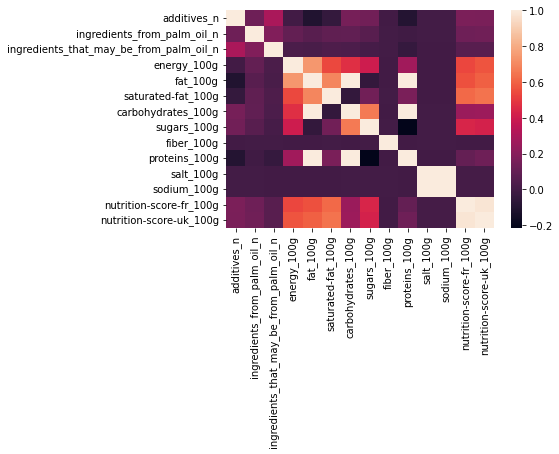

In [12]:
food_corr=sns.heatmap(food.corr())

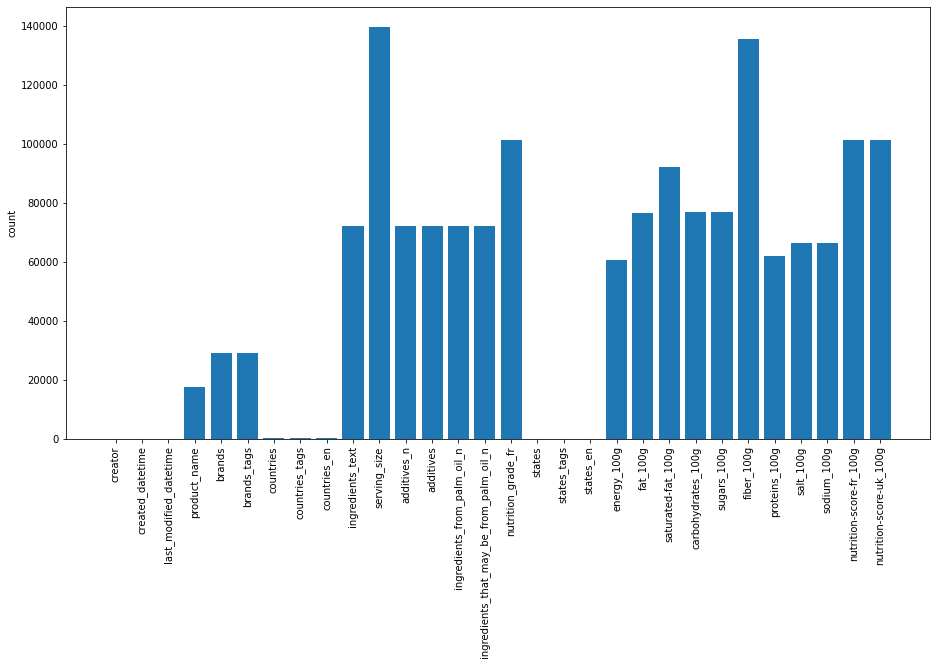

In [13]:

data = food.isnull().sum()

# create figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
# set Y axis label
ax.set_ylabel('count')
# set orientation for X axis labels
plt.xticks(rotation='vertical')
# draw bar chart
ax.bar(food.columns, data)
plt.show()

In [14]:
food.drop('last_modified_datetime',axis=1,inplace=True)

In [15]:
food.head(5)

,creator,created_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_en,ingredients_text,serving_size,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,openfoodfacts-contributors,2016-09-17T09:17:46Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,usda-ndb-import,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,usda-ndb-import,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,usda-ndb-import,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,usda-ndb-import,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,United States,Organic polenta,35 g (0.25 cup),...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


In [19]:
food.product_name.value_counts().head(5)

Ice Cream                 411
Extra Virgin Olive Oil    303
Potato Chips              281
Premium Ice Cream         226
Tomato Ketchup            190
Name: product_name, dtype: int64

In [20]:
food.product_name.value_counts().tail(10)


Gprivate Selection Garmin Nüvi 250 Europe Produit Neuf. Sav France.                                                                        1
Northland, 100% Juice, Cranberry                                                                                                           1
Northland, 100% Juice, Cranberry Grape                                                                                                     1
Northland, The Power Of Dark Fruit, 100% Juice, Flavored Blend Of 5 Juices From Concentrate With Added Ingredients, Cranberry Raspberry    1
Northland, 100% Juice, Cranberry Cherry                                                                                                    1
Northland, 100% Juice Blend, Cranberry Pomegranate                                                                                         1
Northland, 100% Juice, Pomegranate Blueberry                                                                                               1
Northland, Su

C:\Users\AI\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Density'>

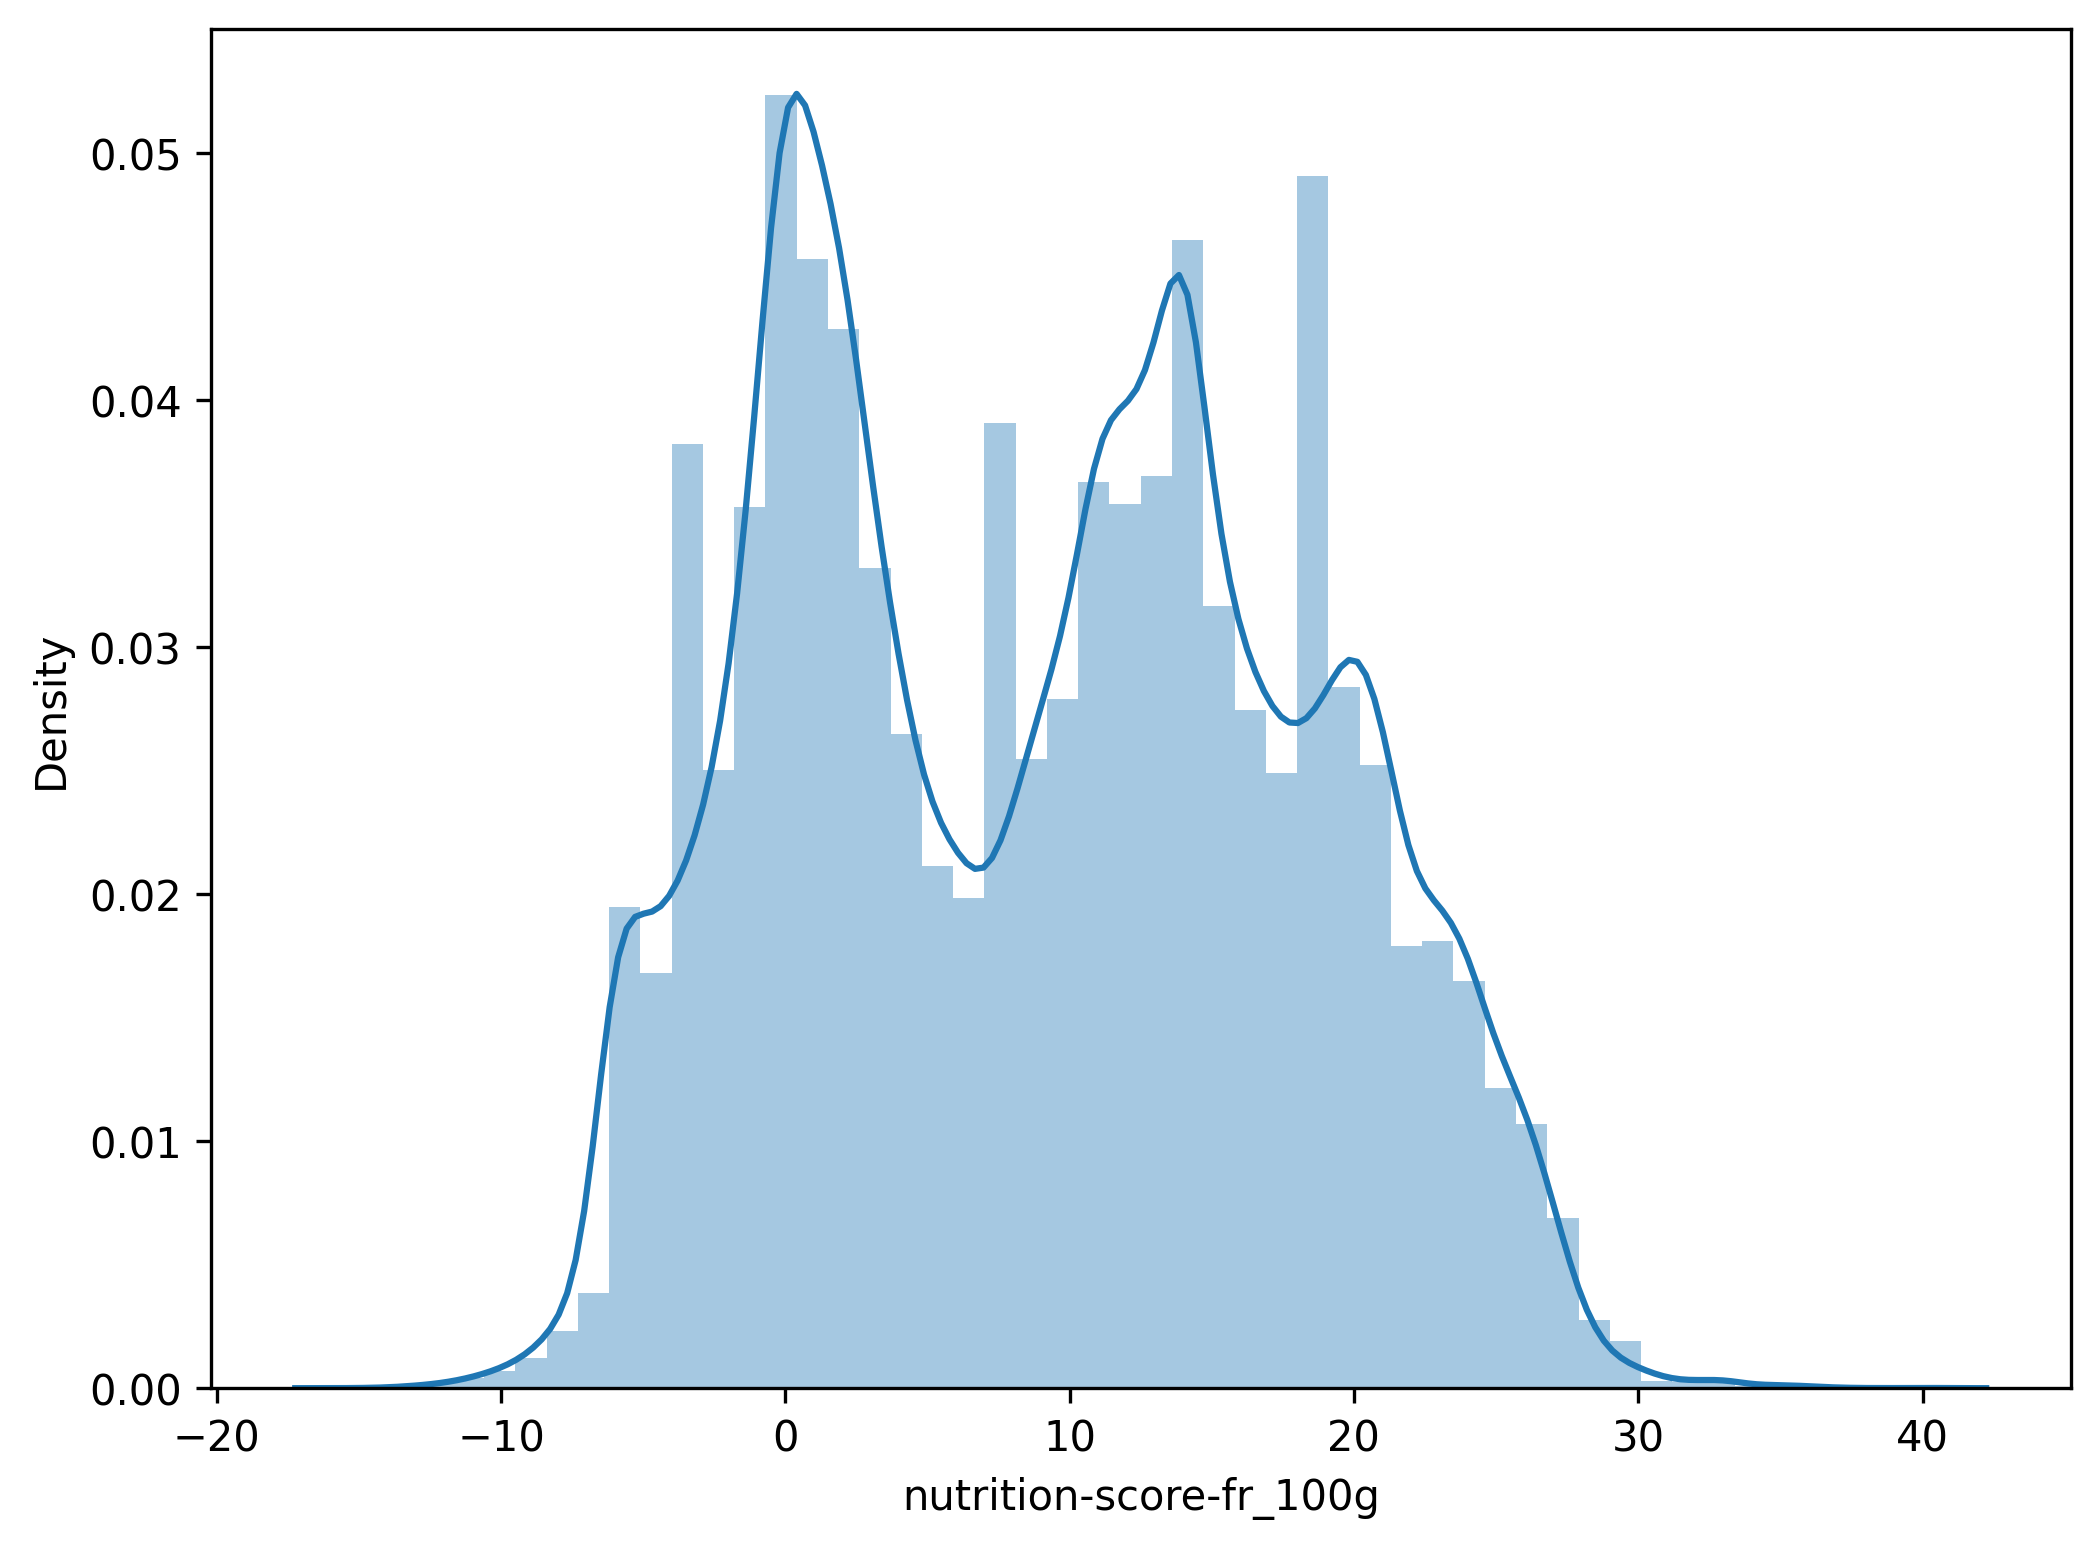

In [23]:
plt.figure(figsize=(8,6), dpi=300)
sns.distplot(food['nutrition-score-fr_100g'])